In [ ]:
# CLEANING SALARY

import pandas as pd
import matplotlib.pyplot as plt

all_salaries_df = []

#df = pd.read_csv('/content/RISE-Retention-Research/data/salaries/salaries_10_11.csv')
#display(df.head())

for i in range(10,21):
  src = '/content/RISE-Retention-Research/data/salaries/salaries_' + str(i) + '_' + str(i+1) +'.csv'
  salaries_df = pd.read_csv(src)
  salaries_df = salaries_df.drop(index=0)
  salaries_df.columns = ["District Name", "District Code", "Salary Totals", "Average Salary", "FTE Count"]
  salaries_df = salaries_df.drop(columns=["District Name", "FTE Count", "Salary Totals"])
  salaries_df["Year"] = 2001+i
  all_salaries_df.append(salaries_df)

combined_salaries_df = pd.concat(all_salaries_df, ignore_index=True)
combined_salaries_df["Average Salary"] = combined_salaries_df["Average Salary"].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
combined_salaries_df["Average Salary"] = pd.to_numeric(combined_salaries_df["Average Salary"])

filtered_salaries_df = combined_salaries_df[combined_salaries_df['District Code'] != '00000000']

# Inflation data (using 2010 as the base year)
inflation_rates = {
    2010: 1.0000, # Base year
    2011: 1.0164,
    2012: 1.0164 * 1.0316, # Cumulative inflation
    2013: 1.0164 * 1.0316 * 1.0207,
    2014: 1.0164 * 1.0316 * 1.0207 * 1.0146,
    2015: 1.0164 * 1.0316 * 1.0207 * 1.0146 * 1.0162,
    2016: 1.0164 * 1.0316 * 1.0207 * 1.0146 * 1.0162 * 1.0012,
    2017: 1.0164 * 1.0316 * 1.0207 * 1.0146 * 1.0162 * 1.0012 * 1.0126,
    2018: 1.0164 * 1.0316 * 1.0207 * 1.0146 * 1.0162 * 1.0012 * 1.0126 * 1.0213,
    2019: 1.0164 * 1.0316 * 1.0207 * 1.0146 * 1.0162 * 1.0012 * 1.0126 * 1.0213 * 1.0249,
    2020: 1.0164 * 1.0316 * 1.0207 * 1.0146 * 1.0162 * 1.0012 * 1.0126 * 1.0213 * 1.0249 * 1.0176,
    2021: 1.0164 * 1.0316 * 1.0207 * 1.0146 * 1.0162 * 1.0012 * 1.0126 * 1.0213 * 1.0249 * 1.0176 * 1.0123,
    2022: 1.0164 * 1.0316 * 1.0207 * 1.0146 * 1.0162 * 1.0012 * 1.0126 * 1.0213 * 1.0249 * 1.0176 * 1.0123 * 1.0470,
}

# Calculate real average salary
combined_salaries_df['Real Average Salary'] = combined_salaries_df.apply(
    lambda row: row['Average Salary'] / inflation_rates.get(row['Year'], 1.0), axis=1
)


mask = combined_salaries_df['District Code'].str.fullmatch(r'00000000', case=False)
state = combined_salaries_df.loc[mask, ['Year', 'Average Salary', 'Real Average Salary']].copy()


display(combined_salaries_df.head(5000))

,District Code,Average Salary,Year,Real Average Salary
0,00010000,73887,2011,72694.805195
1,00020000,75741,2011,74518.890201
2,06000000,72411,2011,71242.621015
3,00030000,57227,2011,56303.620622
4,06030000,65939,2011,64875.049193
...,...,...,...,...
3712,03470000,89168,2021,73923.232329
3713,03480000,93339,2021,77381.129804
3714,03490000,43543,2021,36098.592604
3715,03500000,87348,2021,72414.391906


In [ ]:
#CLEANING CLASS SIZE

all_class_sizes_df = []

#df=pd.read_csv('/content/RISE-Retention-Research/data/class_size/size_10_11.csv')
#display(df.head())

for i in range(10,21):
  src = '/content/RISE-Retention-Research/data/class_size/size_' + str(i) + '_' + str(i+1) +'.csv'
  class_size_df = pd.read_csv(src)
  class_size_df = class_size_df.drop(index=0)
  class_size_df = class_size_df.drop(columns = ["Unnamed: 2", "Unnamed: 4", "Unnamed: 5", "Unnamed: 6", "Unnamed: 7", "Unnamed: 8", "Unnamed: 9"])
  class_size_df.columns = ["District Name", "District Code", "Average Class Size"]
  class_size_df = class_size_df.drop(columns = ["District Name"])
  class_size_df["Year"] = 2001+i
  all_class_sizes_df.append(class_size_df)

combined_class_sizes_df = pd.concat(all_class_sizes_df, ignore_index=True)

mask = combined_class_sizes_df['District Code'].str.fullmatch(r'00000000', case=False)
state = combined_class_sizes_df.loc[mask, ['Year', 'Average Class Size']].copy()

display(combined_class_sizes_df.head(5000))


,District Code,Average Class Size,Year
0,04450000,18.4,2011
1,00010000,25.7,2011
2,04120000,23.0,2011
3,00020000,23.1,2011
4,06000000,21.1,2011
...,...,...,...
4439,03470000,13.8,2021
4440,03480000,14.1,2021
4441,03490000,6.0,2021
4442,03500000,18.4,2021


In [ ]:
#CLEANING EXPENDITURES

import pandas as pd
import matplotlib.pyplot as plt

all_per_pupil_df = []

#df=pd.read_csv('/content/RISE-Retention-Research/data/per_pupil/pupil_10.csv')
#display(df.head())

for i in range(11,22):
  src = '/content/RISE-Retention-Research/data/per_pupil/pupil_' + str(i) +'.csv'
  per_pupil_df = pd.read_csv(src)
  per_pupil_df = per_pupil_df.drop(columns = ["Unnamed: 8", "Unnamed: 2", "Unnamed: 3", "Unnamed: 4", "Unnamed: 5", "Unnamed: 6",])
  per_pupil_df = per_pupil_df.drop(index=0)
  per_pupil_df.columns = ["District Name", "District Code", "Total Expenditures per Pupil"]
  per_pupil_df = per_pupil_df.drop(columns = ["District Name"])
  per_pupil_df["Year"] = 2000+i
  # Clean and convert to numeric here
  per_pupil_df["Total Expenditures per Pupil"] = per_pupil_df["Total Expenditures per Pupil"].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False).str.strip()
  per_pupil_df["Total Expenditures per Pupil"] = pd.to_numeric(per_pupil_df["Total Expenditures per Pupil"], errors='coerce') # Use errors='coerce' to handle any remaining non-numeric values

  all_per_pupil_df.append(per_pupil_df)

combined_per_pupil_df = pd.concat(all_per_pupil_df, ignore_index=True)

# Inflation data (using 2010 as the base year)
inflation_rates = {
    2010: 1.0000, # Base year
    2011: 1.0164,
    2012: 1.0164 * 1.0316, # Cumulative inflation
    2013: 1.0164 * 1.0316 * 1.0207,
    2014: 1.0164 * 1.0316 * 1.0207 * 1.0146,
    2015: 1.0164 * 1.0316 * 1.0207 * 1.0146 * 1.0162,
    2016: 1.0164 * 1.0316 * 1.0207 * 1.0146 * 1.0162 * 1.0012,
    2017: 1.0164 * 1.0316 * 1.0207 * 1.0146 * 1.0162 * 1.0012 * 1.0126,
    2018: 1.0164 * 1.0316 * 1.0207 * 1.0146 * 1.0162 * 1.0012 * 1.0126 * 1.0213,
    2019: 1.0164 * 1.0316 * 1.0207 * 1.0146 * 1.0162 * 1.0012 * 1.0126 * 1.0213 * 1.0249,
    2020: 1.0164 * 1.0316 * 1.0207 * 1.0146 * 1.0162 * 1.0012 * 1.0126 * 1.0213 * 1.0249 * 1.0176,
    2021: 1.0164 * 1.0316 * 1.0207 * 1.0146 * 1.0162 * 1.0012 * 1.0126 * 1.0213 * 1.0249 * 1.0176 * 1.0123,
    2022: 1.0164 * 1.0316 * 1.0207 * 1.0146 * 1.0162 * 1.0012 * 1.0126 * 1.0213 * 1.0249 * 1.0176 * 1.0123 * 1.0470,
}

# Calculate real expenditures per pupil
combined_per_pupil_df['Real Total Expenditures per Pupil'] = combined_per_pupil_df.apply(
    lambda row: row['Total Expenditures per Pupil'] / inflation_rates.get(row['Year'], 1.0), axis=1
)


mask = combined_per_pupil_df['District Code'].str.fullmatch(r'00000000', case=False)
state = combined_per_pupil_df.loc[mask, ['Year', 'Total Expenditures per Pupil', 'Real Total Expenditures per Pupil']].copy()


display(combined_per_pupil_df.head(5000))

,District Code,Total Expenditures per Pupil,Year,Real Total Expenditures per Pupil
0,00010000,11415.14,2011,11230.952381
1,00020000,11480.23,2011,11294.992129
2,06000000,13181.82,2011,12969.126328
3,00030000,11454.39,2011,11269.569067
4,06030000,12017.11,2011,11823.209366
...,...,...,...,...
3958,03470000,20497.87,2021,16993.414748
3959,03480000,17315.90,2021,14355.455978
3960,03490000,14577.28,2021,12085.049078
3961,03500000,20107.03,2021,16669.395412


In [ ]:
#CLEANING RETENTION


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

all_r_dfs = []


for i in range(12,23):
  src = '/content/RISE-Retention-Research/data/retention/retention_' + str(i) + '.csv'
  r_df = pd.read_csv(src)
  r_df = r_df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4", "Unnamed: 5", "Unnamed: 6", "Unnamed: 7"])
  r_df = r_df.drop(index=0)
  r_df.columns = ["District Name", "District Code", "Teacher Total", "Teacher # Retained", "Teacher % Retained"]
  r_df = r_df.drop(columns = ["Teacher Total", "Teacher # Retained"])
  r_df["Year"] = 1999+i
  all_r_dfs.append(r_df)


combined_r_df = pd.concat(all_r_dfs, ignore_index=True)
combined_r_df["District Name"] = combined_r_df["District Name"].str.lower()
combined_r_df["Teacher % Retained"] = pd.to_numeric(combined_r_df["Teacher % Retained"], errors='coerce')
combined_r_df = combined_r_df.dropna()

mask = combined_r_df['District Code'].str.fullmatch(r'00000000', case=False)
state = combined_r_df.loc[mask, ['Year', 'Teacher % Retained']].copy()

state['Teacher % Retained'] = pd.to_numeric(state['Teacher % Retained'], errors='coerce')
state = (state.groupby('Year', as_index=False)['Teacher % Retained'].mean())

display(combined_r_df.head(5000))


,District Name,District Code,Teacher % Retained,Year
0,abby kelley foster charter public (district),04450000,73.9,2011
1,abington,00010000,88.1,2011
2,academy of the pacific rim charter public (dis...,04120000,70.3,2011
3,acton,00020000,94.6,2011
4,acton-boxborough,06000000,93.8,2011
...,...,...,...,...
4418,worcester,03480000,88.9,2021
4419,worthington,03490000,66.7,2021
4420,wrentham,03500000,94.7,2021
4421,state totals,00000000,86.8,2021


In [ ]:
#COMBINED DF

import pandas as pd

cleaned_df = pd.read_csv('/content/RISE-Retention-Research/cleaned_data.csv')
display(cleaned_df.head())

,District Name,District Code,Locale,Teacher % Retained,Year,Retention Category,Total Expenditures per Pupil,Adjusted Total Expenditures per Pupil,Adjusted Expenditures Category,Average Salary,Adjusted Average Salary,Adjusted Salary Category,Average Class Size,Class Size Category
0,abington,10000,Suburban,88.1,2011,medium,11415.14,11230.952381,low,73887.0,72694.805195,high,25.7,large
1,acton,20000,Suburban,94.6,2011,high,11480.23,11294.992129,low,75741.0,74518.890201,high,23.1,large
2,acton-boxborough,6000000,Suburban,93.8,2011,high,13181.82,12969.126328,low,72411.0,71242.621015,high,21.1,large
3,acushnet,30000,Suburban,91.9,2011,high,11454.39,11269.569067,low,57227.0,56303.620622,low,18.7,medium
4,adams-cheshire,6030000,Rural,95.5,2011,high,12017.11,11823.209366,low,65939.0,64875.049193,medium,16.9,medium


R² for Rural districts: 0.171


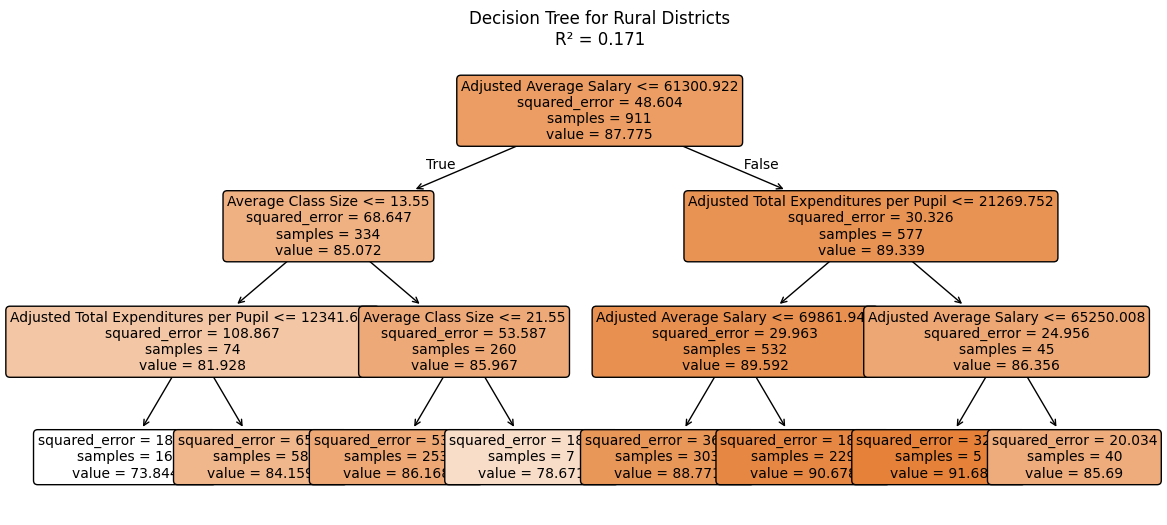

R² for Suburban districts: 0.094


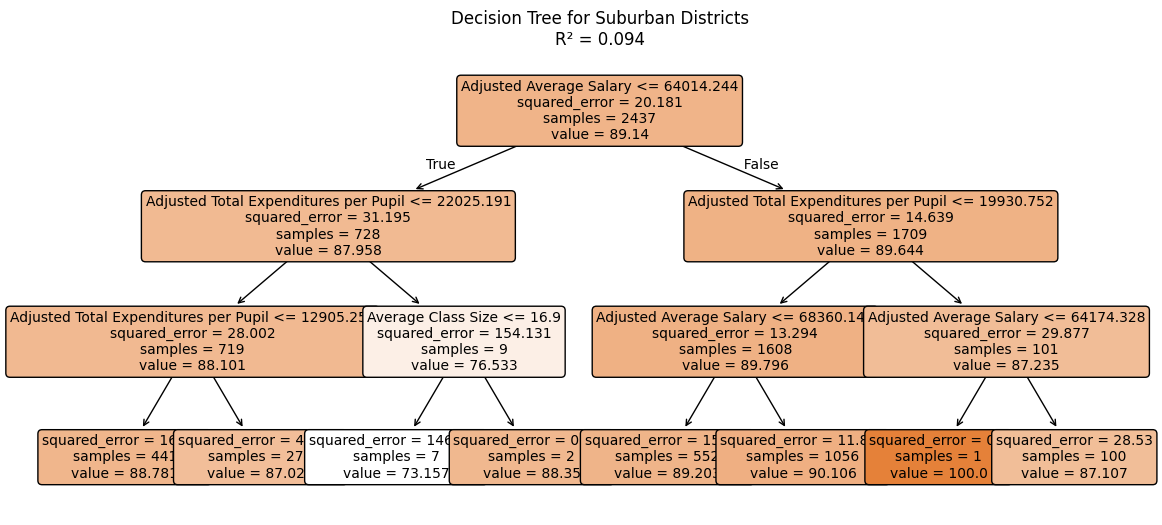

R² for Urban districts: 0.172


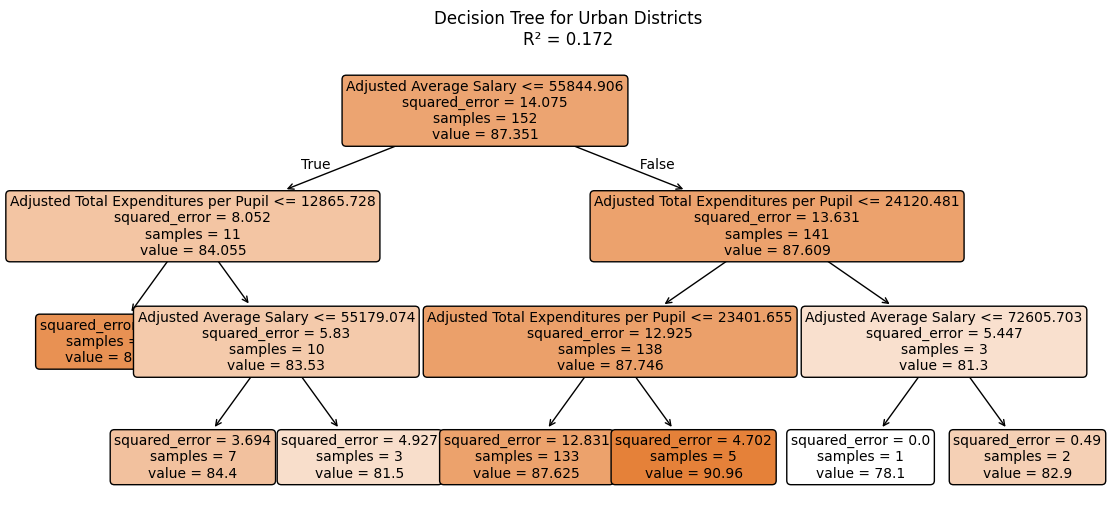

In [60]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt


cleaned_df = pd.read_csv('/content/RISE-Retention-Research/cleaned_data.csv')
cleaned_df.columns = cleaned_df.columns.str.strip()

rural_df = cleaned_df[cleaned_df['Locale'] == 'Rural']
suburban_df = cleaned_df[cleaned_df['Locale'] == 'Suburban']
urban_df = cleaned_df[cleaned_df['Locale'] == 'Urban']

def build_tree(df, title):
    X = df[['Adjusted Total Expenditures per Pupil',
            'Adjusted Average Salary',
            'Average Class Size']]
    y = df['Teacher % Retained']

    model = DecisionTreeRegressor(random_state=42, max_depth=3)
    model.fit(X, y)

    r2 = model.score(X, y)
    print(f"R² for {title} districts: {r2:.3f}")

    plt.figure(figsize=(14, 6))
    plot_tree(model,
              feature_names=X.columns,
              filled=True,
              rounded=True,
              fontsize=10)
    plt.title(f"Decision Tree for {title} Districts\nR² = {r2:.3f}")
    plt.show()


build_tree(rural_df, "Rural")
build_tree(suburban_df, "Suburban")
build_tree(urban_df, "Urban")


In [ ]:
#Import Model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Create Tree
from sklearn.tree import DecisionTreeRegressor

# Limit the depth of the tree to prevent overfitting
dt_regressor = DecisionTreeRegressor(random_state=42, max_depth=5)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [ ]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error, r2_score

y_pred = dt_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 22.192717926086107
R-squared: 0.10737665190519086


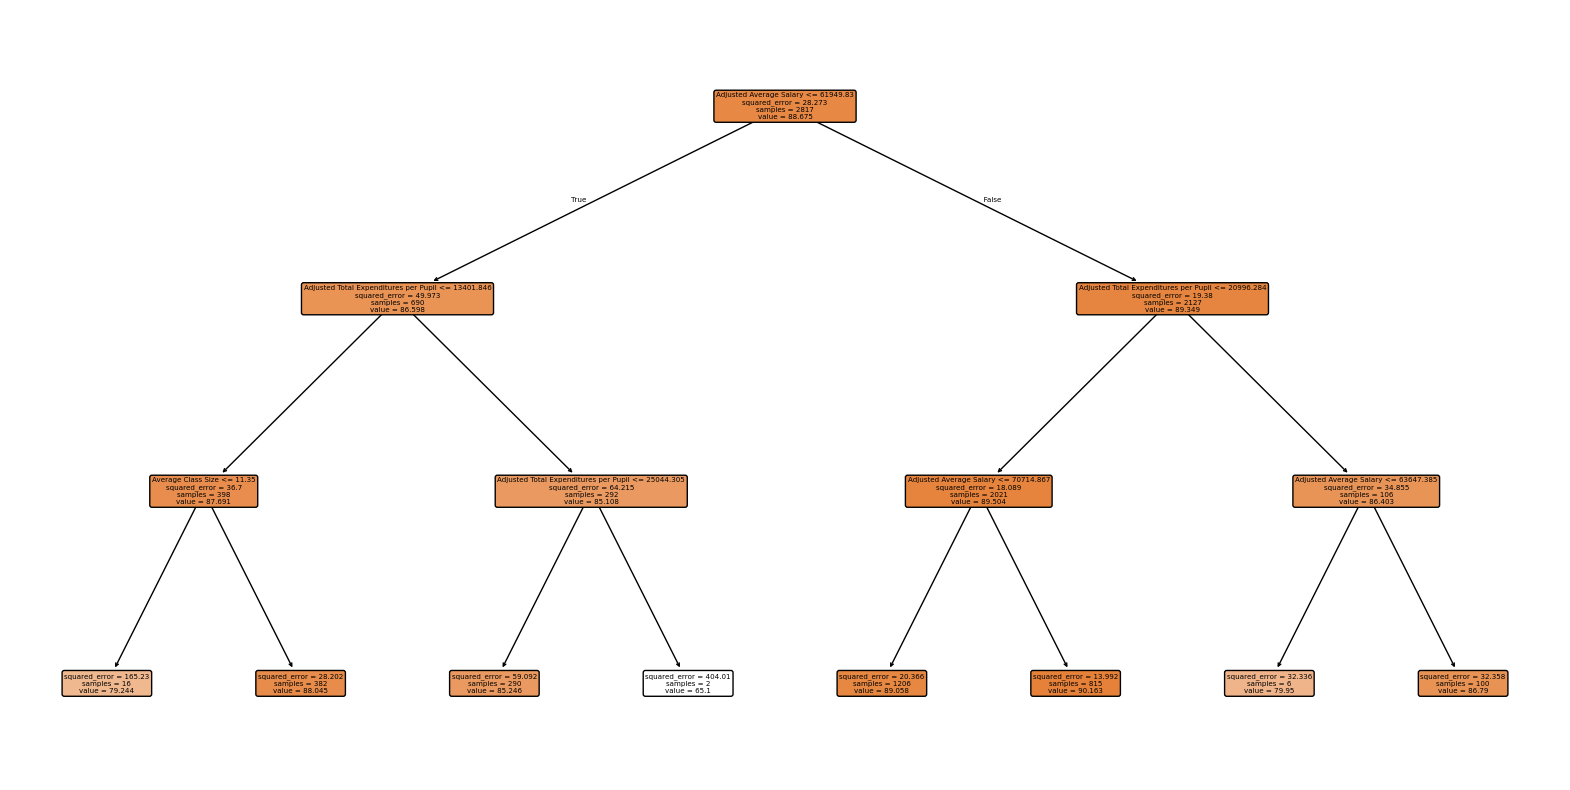

In [ ]:
#Visualize tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor


dt_regressor = DecisionTreeRegressor(random_state=42, max_depth = 3)
dt_regressor.fit(X_train, y_train)


plt.figure(figsize=(20, 10))
plot_tree(dt_regressor, feature_names=X.columns.tolist(), filled=True, rounded=True, node_ids=False, proportion=False)
plt.show()

#Tree Description

##"Is Real Average Salary ≤ $58,175?"

If YES → Go Left (lower salary group)

If NO → Go Right (higher salary group)

###LEFT:
"Is Real Average Salary ≤ $27,350?"

If YES -> Teacher retention = 13.0% (very low because only 1 sample)

2. If NO:
➡️ Ask: "Is Average Class Size ≤ 21.55?"

a. If YES:
➡️ Ask: "Is Real Average Salary ≤ $19,790?"

If YES:

Retention = ~79.95%

If NO:

Retention = ~85.37%

b. If NO (larger class sizes):
➡️ Ask: "Is Total Spending per Pupil ≤ $14,784?"

If YES:

Retention = ~77.51%

If NO:

Retention = ~62.08%

###RIGHT:
Ask: "Is Average Class Size ≤ 55.45?"

1. If NO (1 sample):
Retention = 22.2% (low)

2. If YES:
➡️ Ask: "Is Real Average Salary ≤ $64,008?"

a. If YES:
➡️ Ask: "Is Total Spending per Pupil ≤ $25,349?"

If YES:

Retention = 45.0% (low)

If NO:

Retention = ~87.63% (high)

b. If NO (very high salary):
➡️ Ask: "Is Spending per Pupil ≤ $20,031?"

If YES:

Retention = ~89.61% (very high)

If NO:

Retention = ~87.06% (also very high)

##Final Takeaways:

1. Higher salaries = better retention, especially when paired with high spending per student

2. Small class sizes help, especially in lower salary settings

3. Low salary + large class + low spending = worst-case (as low as 13–62% retention)

4. Even with high salaries, if the district under-spends per student, retention can drop



In [ ]:
# Get the leaf indices for the test data
leaf_indices = dt_regressor.apply(X_test[X.columns])

# Add leaf indices and actual 'Teacher % Retained' to X_test for analysis
X_test['leaf_node'] = leaf_indices
X_test['Teacher % Retained'] = y_test

# Group by leaf node and get variability statistics
grouped_by_leaf = X_test.groupby('leaf_node')
variability_stats = grouped_by_leaf['Teacher % Retained'].describe()
display(variability_stats)

,count,mean,std,min,25%,50%,75%,max
leaf_node,,,,,,,,
3,2.0,74.600000,4.525483,71.4,73.000,74.60,76.200,77.8
4,68.0,86.620588,8.546144,40.0,84.475,87.65,90.975,100.0
6,103.0,87.240777,5.546443,66.7,84.950,87.80,91.300,100.0
10,293.0,89.419795,4.138255,72.3,87.500,89.70,92.200,100.0
11,210.0,89.898571,3.455409,71.4,88.000,90.20,92.200,97.4
14,29.0,87.034483,4.423822,78.6,84.400,86.80,88.500,100.0


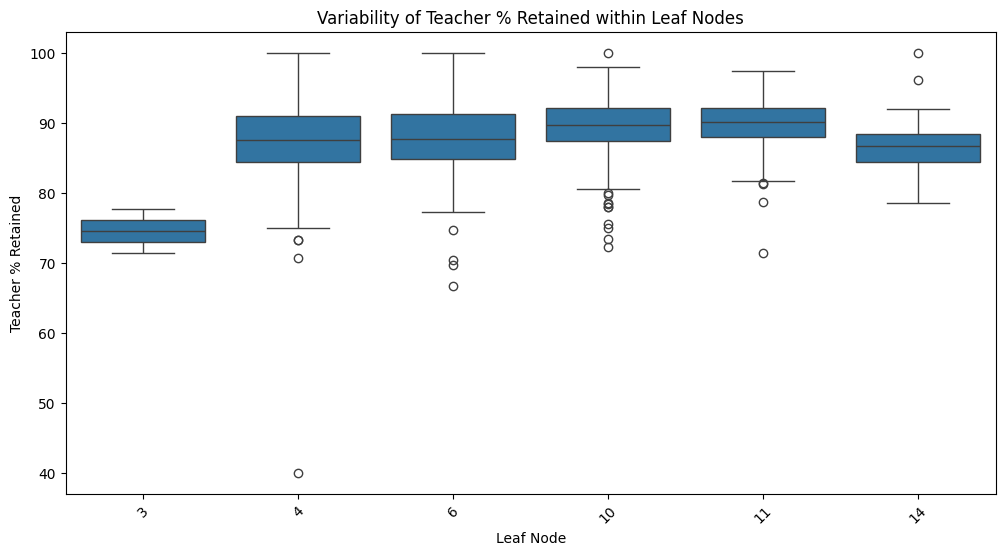

In [ ]:
#Visualize with Box Plots
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='leaf_node', y='Teacher % Retained', data=X_test)
plt.title('Variability of Teacher % Retained within Leaf Nodes')
plt.xlabel('Leaf Node')
plt.ylabel('Teacher % Retained')
plt.xticks(rotation=45)
plt.show()

In [ ]:

correlation_matrix = df_cleaned[['Teacher % Retained', 'Real Total Expenditures per Pupil', 'Real Average Salary', 'Average Class Size']].corr()

display(correlation_matrix)

,Teacher % Retained,Real Total Expenditures per Pupil,Real Average Salary,Average Class Size
Teacher % Retained,1.000000,-0.095999,0.278626,-0.012249
Real Total Expenditures per Pupil,-0.095999,1.000000,0.333606,-0.449112
Real Average Salary,0.278626,0.333606,1.000000,0.080691
Average Class Size,-0.012249,-0.449112,0.080691,1.000000


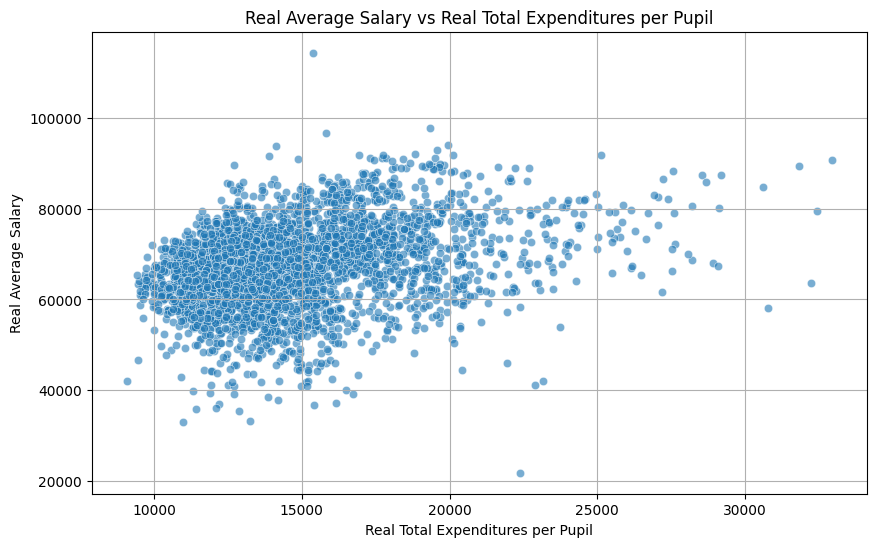

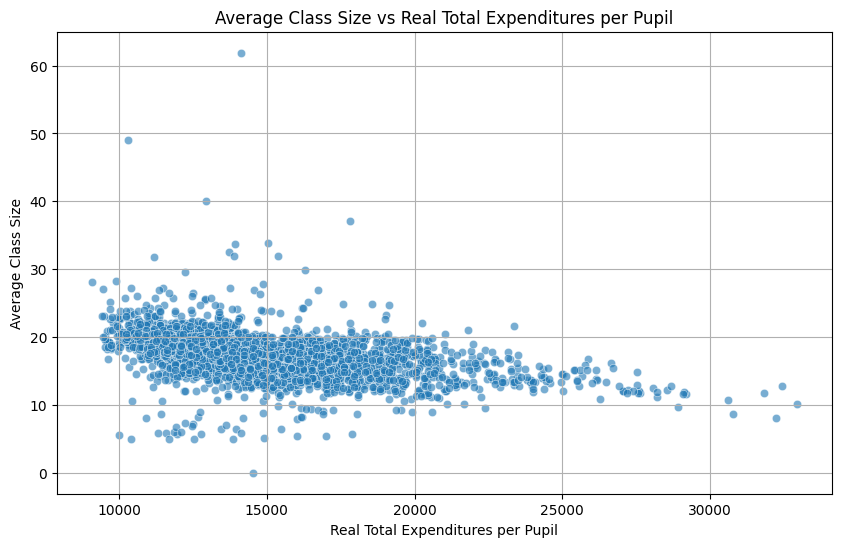

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Real Average Salary vs Real Total Expenditures per Pupil
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='Real Total Expenditures per Pupil', y='Real Average Salary', alpha=0.6)
plt.title('Real Average Salary vs Real Total Expenditures per Pupil')
plt.xlabel('Real Total Expenditures per Pupil')
plt.ylabel('Real Average Salary')
plt.grid(True)
plt.show()

# Scatter plot for Average Class Size vs Real Total Expenditures per Pupil
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='Real Total Expenditures per Pupil', y='Average Class Size', alpha=0.6)
plt.title('Average Class Size vs Real Total Expenditures per Pupil')
plt.xlabel('Real Total Expenditures per Pupil')
plt.ylabel('Average Class Size')
plt.grid(True)
plt.show()

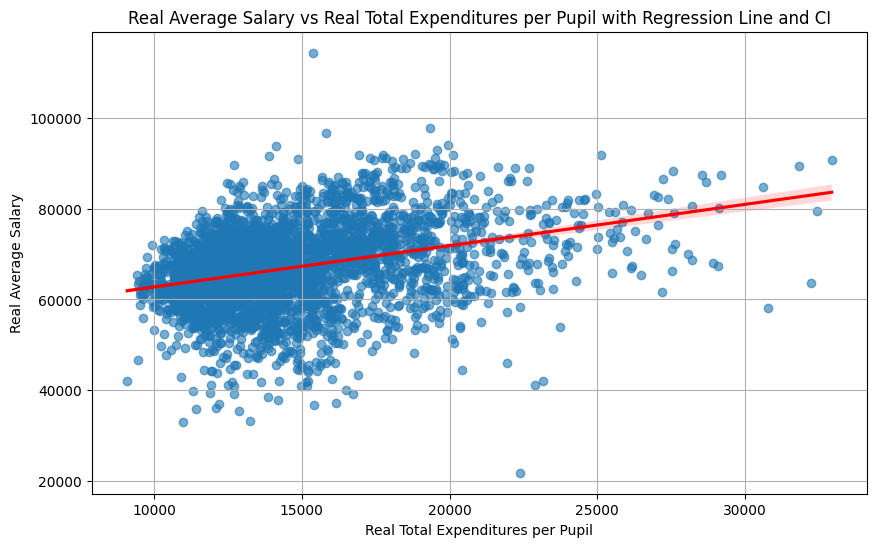

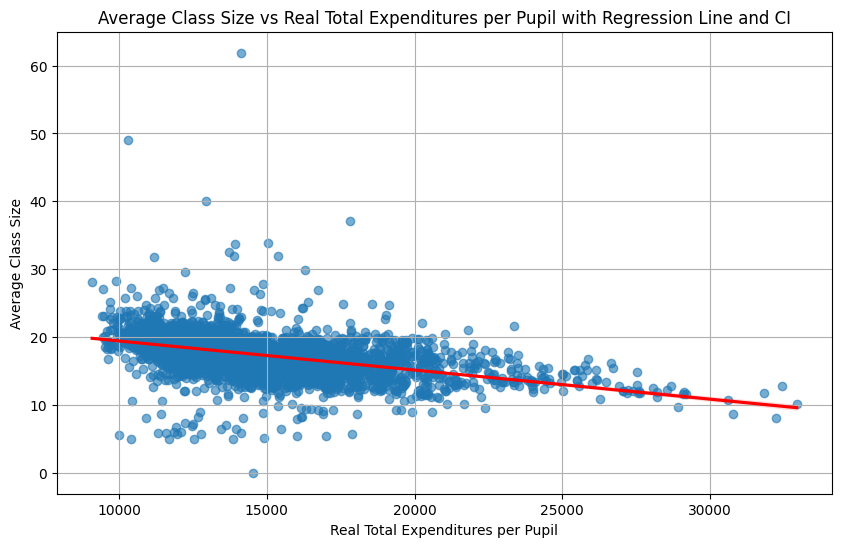

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.regplot(data=df_cleaned, x='Real Total Expenditures per Pupil', y='Real Average Salary', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Real Average Salary vs Real Total Expenditures per Pupil with Regression Line and CI')
plt.xlabel('Real Total Expenditures per Pupil')
plt.ylabel('Real Average Salary')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
sns.regplot(data=df_cleaned, x='Real Total Expenditures per Pupil', y='Average Class Size', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Average Class Size vs Real Total Expenditures per Pupil with Regression Line and CI')
plt.xlabel('Real Total Expenditures per Pupil')
plt.ylabel('Average Class Size')
plt.grid(True)
plt.show()

In [ ]:
import statsmodels.api as sm

# Linear regression for Real Average Salary vs Real Total Expenditures per Pupil
X_salary = sm.add_constant(df_cleaned['Real Total Expenditures per Pupil']) # Add an intercept term
model_salary = sm.OLS(df_cleaned['Real Average Salary'], X_salary).fit()

print("Linear Regression Results: Real Average Salary vs Real Total Expenditures per Pupil")
print(model_salary.summary())

# Linear regression for Average Class Size vs Real Total Expenditures per Pupil
X_class_size = sm.add_constant(df_cleaned['Real Total Expenditures per Pupil']) # Add an intercept term
model_class_size = sm.OLS(df_cleaned['Average Class Size'], X_class_size).fit()

print("\nLinear Regression Results: Average Class Size vs Real Total Expenditures per Pupil")
print(model_class_size.summary())

Linear Regression Results: Real Average Salary vs Real Total Expenditures per Pupil
                             OLS Regression Results                            
Dep. Variable:     Real Average Salary   R-squared:                       0.111
Model:                             OLS   Adj. R-squared:                  0.111
Method:                  Least Squares   F-statistic:                     461.0
Date:                 Wed, 30 Jul 2025   Prob (F-statistic):           1.93e-96
Time:                         19:16:56   Log-Likelihood:                -38448.
No. Observations:                 3683   AIC:                         7.690e+04
Df Residuals:                     3681   BIC:                         7.691e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------

In [ ]:
# Get the confidence intervals for the coefficients of the salary model
salary_conf_int = model_salary.conf_int(alpha=0.05)

print("95% Confidence Interval for Real Average Salary vs Real Total Expenditures per Pupil:")
print("Intercept:", salary_conf_int.loc['const'].values)
print("Real Total Expenditures per Pupil (Slope):", salary_conf_int.loc['Real Total Expenditures per Pupil'].values)

# Get the confidence intervals for the coefficients of the class size model
class_size_conf_int = model_class_size.conf_int(alpha=0.05)

print("\n95% Confidence Interval for Average Class Size vs Real Total Expenditures per Pupil:")
print("Intercept:", class_size_conf_int.loc['const'].values)
print("Real Total Expenditures per Pupil (Slope):", class_size_conf_int.loc['Real Total Expenditures per Pupil'].values)

NameError: name 'model_salary' is not defined

In [55]:
import statsmodels.api as sm

# Linear regression for Real Average Salary vs Real Total Expenditures per Pupil
X_salary = sm.add_constant(df_cleaned['Real Total Expenditures per Pupil']) # Add an intercept term
model_salary = sm.OLS(df_cleaned['Real Average Salary'], X_salary).fit()

print("Linear Regression Results: Real Average Salary vs Real Total Expenditures per Pupil")
print(model_salary.summary())

# Linear regression for Average Class Size vs Real Total Expenditures per Pupil
X_class_size = sm.add_constant(df_cleaned['Real Total Expenditures per Pupil']) # Add an intercept term
model_class_size = sm.OLS(df_cleaned['Average Class Size'], X_class_size).fit()

print("\nLinear Regression Results: Average Class Size vs Real Total Expenditures per Pupil")
print(model_class_size.summary())

Linear Regression Results: Real Average Salary vs Real Total Expenditures per Pupil
                             OLS Regression Results                            
Dep. Variable:     Real Average Salary   R-squared:                       0.111
Model:                             OLS   Adj. R-squared:                  0.111
Method:                  Least Squares   F-statistic:                     461.0
Date:                 Thu, 31 Jul 2025   Prob (F-statistic):           1.93e-96
Time:                         17:42:54   Log-Likelihood:                -38448.
No. Observations:                 3683   AIC:                         7.690e+04
Df Residuals:                     3681   BIC:                         7.691e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------